In [ ]:
"""
Author: Alex Martin
Purpose: To approximate the ground state of a simple system consisting of two spin-1/2 particles using the VQE framework.
Date: Jan. 6, 2026

This code is utilized in "Studying the Hyperfine Interaction Using the Variational Quantum Eigensolver" by J. W. Martin and A. Martin.
"""

In [1]:
!pip install qiskit
#!pip install qiskit-aer
!pip install py-bobyqa
!pip install numpy
!pip install matplotlib
!pip install qiskit-ibm-runtime

!pip install pylatexenc
!apt-get update
!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended # Run this to use latex in your colab environment.
!pip install scienceplots

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.0/58.0 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.5/378.5 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=8f26c601f2dafb13fa121f31ad276955a2557c77dadd882f358b923f0a52c635
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178be

In [3]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_ibm_runtime import QiskitRuntimeService
from typing import List, Tuple, Callable
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

service = QiskitRuntimeService(token="Qd57ByU5w14dhlBpjJGeZ3o1VEkGzKqzlGrQ1VTK2iFM",
                               channel="ibm_quantum_platform",
                               instance="crn:v1:bluemix:public:quantum-computing:us-east:a/de01a88c198144c7a5a22c7ef78f5609:f0fab83b-093c-48bb-9707-5170f867882a::")

QPUs = service.backends()
print(QPUs) # Prints a list of QPUs to choose from.

qiskit_runtime_service._discover_account:WARNING:2026-01-07 05:09:36,089: Loading account with the given token. A saved account will not be used.


[<IBMBackend('ibm_fez')>, <IBMBackend('ibm_marrakesh')>, <IBMBackend('ibm_torino')>]


In [10]:
import datetime

# Print the current date and time
print(f"Calibration data accessed on: {datetime.datetime.now()}")

# Retrieve qubit properties
backend_name = 'ibm_fez'
backend = next(qpu for qpu in QPUs if qpu.name == backend_name)
for qubit_index in range(156):
    qubit_props = backend.properties().qubit_property(qubit_index)

    # Access specific properties
    t1 = qubit_props.get("T1", (None,))[0]
    t2 = qubit_props.get("T2", (None,))[0]
    frequency = qubit_props.get("frequency", (None,))[0]
    anharmonicity = qubit_props.get("anharmonicity", (None,))[0]
    readout_error = qubit_props.get("readout_error", (None,))[0]
    prob_meas0_prep1 = qubit_props.get("prob_meas0_prep1", (None,))[0]
    prob_meas1_prep0 = qubit_props.get("prob_meas1_prep0", (None,))[0]
    readout_length = qubit_props.get("readout_length", (None,))[0]

    print(f"Qubit {qubit_index} Properties:")
    print(f"  T1: {t1} seconds")
    print(f"  T2: {t2} seconds")
    print(f"  Frequency: {frequency} Hz")
    print(f"  Anharmonicity: {anharmonicity} Hz")
    print(f"  Readout Error: {readout_error}")
    print(f"  P(0 | 1): {prob_meas0_prep1}")
    print(f"  P(1 | 0): {prob_meas1_prep0}")
    print(f"  Readout Length: {readout_length} seconds")
    print("-" * 40)

Calibration data accessed on: 2026-01-07 05:18:51.281001
Qubit 0 Properties:
  T1: 3.2046568449113184e-05 seconds
  T2: 3.065175586048317e-05 seconds
  Frequency: None Hz
  Anharmonicity: None Hz
  Readout Error: 0.009521484375
  P(0 | 1): 0.017333984375
  P(1 | 0): 0.001708984375
  Readout Length: 1.56e-06 seconds
----------------------------------------
Qubit 1 Properties:
  T1: 0.00021446144753922046 seconds
  T2: 0.0002774092588369999 seconds
  Frequency: None Hz
  Anharmonicity: None Hz
  Readout Error: 0.047119140625
  P(0 | 1): 0.072998046875
  P(1 | 0): 0.021240234375
  Readout Length: 1.56e-06 seconds
----------------------------------------
Qubit 2 Properties:
  T1: 0.00017983463032942467 seconds
  T2: 0.00013379115926413874 seconds
  Frequency: None Hz
  Anharmonicity: None Hz
  Readout Error: 0.005859375
  P(0 | 1): 0.00830078125
  P(1 | 0): 0.00341796875
  Readout Length: 1.56e-06 seconds
----------------------------------------
Qubit 3 Properties:
  T1: 0.0002036830610182

In [22]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from collections import Counter
import numpy as np
from qiskit.quantum_info import Statevector
from qiskit.quantum_info import Pauli
from qiskit.quantum_info import SparsePauliOp
from qiskit_ibm_runtime import EstimatorV2 as Estimator, Batch
from qiskit import transpile
from qiskit.circuit import Parameter
import pybobyqa

XX_history = [] # Initialize an empty list to store expectation values

shots = 2048 #1024 is default

hamiltonian = SparsePauliOp.from_list([("XX", 1.0)]) # Define Hamiltonian. This is only the X\otimes X term of the Heisenberg interaction Hamiltonian.

backend = service.backend("ibm_fez")

#batch = Batch(backend=backend)
estimator = Estimator(backend)
estimator.options.default_shots = shots
estimator.options.resilience_level = 1

theta = Parameter("theta")  # Define theta as a Parameter

# Create the quantum circuit with parameter theta. This is the general ansatz with hadamard applied to both qubits to transform to the computational basis before measurement.
XX = QuantumCircuit(2)
XX.h(0)
XX.cx(0, 1)
XX.x(0)
XX.p(theta, 1)
XX.h(0)
XX.h(1)


pm = generate_preset_pass_manager(backend=backend, optimization_level=3) # Defines a pass manager for circuit transpilation.
isa_XX = pm.run(XX) # Transpiles the XX circuit to match the instruction set architecture (ISA) of the chosen QPU.

if isa_XX.layout is not None:
    isa_ham = hamiltonian.apply_layout(isa_XX.layout) # Applies the ISA circuit layout to the Hamiltonian.
else:
    isa_ham = hamiltonian

def objective_function_XX(theta_XX):
    """Objective function for X tensor X."""

    job = estimator.run([(isa_XX, isa_ham, [theta_XX])]) # Creates a job using the primitive unified blocs (PUBs) from above.

    cost_XX = job.result()[0] # Stores the first indexed result from running the job
    XX_history.append(cost_XX) # Appends the expectation value to the XX_history list
    iteration = len(XX_history)

    print(f"Iteration: {iteration}, Exp. Val = {cost_XX.data.evs}, Theta = {theta_XX}")
    return cost_XX.data.evs[0]


rng = np.random.default_rng() # Random number generator
initial_theta = rng.random()  # Generates a float
print(f"\nInitial Theta = {initial_theta},")

# Perform the optimization:
XX_minimum = pybobyqa.solve(
    objective_function_XX,
    [initial_theta], # initial guess, needs to be a list for py-bobyqa
    objfun_has_noise=True,
    maxfun = 5 # Set this according to the problem
)

print(XX_minimum)


Initial Theta = 0.4453785415187683,
Iteration: 1, Exp. Val = [-1.00610628], Theta = [0.44537854]
Iteration: 2, Exp. Val = [-0.99298883], Theta = [0.54537854]
Iteration: 3, Exp. Val = [-1.00045263], Theta = [0.34537854]
Iteration: 4, Exp. Val = [-1.00409703], Theta = [0.42549743]
Iteration: 5, Exp. Val = [-0.99110447], Theta = [0.46152239]
****** Py-BOBYQA Results ******
Solution xmin = [0.44537854]
Objective value f(xmin) = -1.006106275
Needed 5 objective evaluations (at 5 points)
Approximate gradient = [0.46754061]
Approximate Hessian = [[57.20038128]]
Exit flag = 1
Warning (max evals): Objective has been called MAXFUN times
******************************



In [23]:
YY_history = [] # Initialize an empty list to store expectation values

shots = 1024 #1024 is default

hamiltonian = SparsePauliOp.from_list([("YY", 1.0)])

backend = service.backend("ibm_fez")

estimator = Estimator(backend)
estimator.options.default_shots = shots
estimator.options.resilience_level = 1

theta = Parameter("theta")

YY = QuantumCircuit(2)
YY.h(0)
YY.cx(0, 1)
YY.x(0)
YY.p(theta, 1)
YY.rx(np.pi/2, 0)
YY.rx(np.pi/2, 1)

pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
isa_YY = pm.run(YY)

if isa_YY.layout is not None:
    isa_ham = hamiltonian.apply_layout(isa_YY.layout) # Applies the ISA circuit layout to the Hamiltonian.
else:
    isa_ham = hamiltonian

def objective_function_YY(theta_YY):
    """Objective function for Y tensor Y."""

    job = estimator.run([(isa_YY, isa_ham, [theta_YY])]) # Creates a job using the primitive unified blocs (PUBs) from above.

    cost_YY = job.result()[0] # Stores the first indexed result from running the job
    YY_history.append(cost_YY) # Appends the expectation value to the XX_history list
    iteration = len(YY_history)

    print(f"Iteration: {iteration}, Exp. Val = {cost_YY.data.evs}, Theta = {theta_YY}")
    return cost_YY.data.evs[0]


rng = np.random.default_rng() # Random number generator
initial_theta = rng.random()  # Generates a float
print(f"\nInitial Theta = {initial_theta},")

# Perform the optimization:
YY_minimum = pybobyqa.solve(
    objective_function_YY,
    [initial_theta], # initial guess, needs to be a list for py-bobyqa
    objfun_has_noise=True,
    maxfun = 5 # Set this according to the problem
)

print(YY_minimum)


Initial Theta = 0.3505959371634113,
Iteration: 1, Exp. Val = [-0.99375], Theta = [0.35059594]
Iteration: 2, Exp. Val = [-0.97889199], Theta = [0.45059594]
Iteration: 3, Exp. Val = [-0.99650327], Theta = [0.25059594]
Iteration: 4, Exp. Val = [-0.98636633], Theta = [0.27785059]
Iteration: 5, Exp. Val = [-1.00784081], Theta = [0.20010904]
****** Py-BOBYQA Results ******
Solution xmin = [0.20010904]
Objective value f(xmin) = -1.007840812
Needed 5 objective evaluations (at 5 points)
Approximate gradient = [0.12885915]
Approximate Hessian = [[3.79128023]]
Exit flag = 1
Warning (max evals): Objective has been called MAXFUN times
******************************



In [19]:
ZZ_history = [] # Initialize an empty list to store expectation values

shots = 1024 #1024 is default

hamiltonian = SparsePauliOp.from_list([("ZZ", 1.0)])

backend = service.backend("ibm_fez")

estimator = Estimator(backend)
estimator.options.default_shots = shots
estimator.options.resilience_level = 1

theta = Parameter("theta")

ZZ = QuantumCircuit(2)
ZZ.h(0)
ZZ.cx(0, 1)
ZZ.x(0)
ZZ.p(theta, 1)

pm = generate_preset_pass_manager(backend=backend, optimization_level=3)
isa_ZZ = pm.run(ZZ)

if isa_ZZ.layout is not None:
    isa_ham = hamiltonian.apply_layout(isa_ZZ.layout) # Applies the ISA circuit layout to the Hamiltonian.
else:
    isa_ham = hamiltonian

def objective_function_ZZ(theta_ZZ):
    """Objective function for Z tensor Z."""

    job = estimator.run([(isa_ZZ, isa_ham, [theta_ZZ])]) # Creates a job using the primitive unified blocs (PUBs) from above.

    cost_ZZ = job.result()[0] # Stores the first indexed result from running the job
    ZZ_history.append(cost_ZZ) # Appends the expectation value to the XX_history list
    iteration = len(ZZ_history)

    print(f"Iteration: {iteration}, Exp. Val = {cost_ZZ.data.evs}, Theta = {theta_ZZ}")
    return cost_ZZ.data.evs[0]


rng = np.random.default_rng() # Random number generator
initial_theta = rng.random()  # Generates a float
print(f"\nInitial Theta = {initial_theta},")

# Perform the optimization:
ZZ_minimum = pybobyqa.solve(
    objective_function_ZZ,
    [initial_theta], # initial guess, needs to be a list for py-bobyqa
    objfun_has_noise=True,
    maxfun = 5 # Set this according to the problem
)

print(ZZ_minimum)


Initial Theta = 0.849684781802469,
Iteration: 1, Exp. Val = [-1.00807131], Theta = [0.84968478]
Iteration: 2, Exp. Val = [-1.01067068], Theta = [0.94968478]
Iteration: 3, Exp. Val = [-0.99826367], Theta = [0.74968478]
Iteration: 4, Exp. Val = [-1.01094738], Theta = [0.9357457]
Iteration: 5, Exp. Val = [-1.02018314], Theta = [0.92408322]
Iteration: 6, Exp. Val = [-1.02395919], Theta = [0.90211704]
Iteration: 7, Exp. Val = [-1.00477368], Theta = [0.89687381]
Iteration: 8, Exp. Val = [-1.01539703], Theta = [0.90996725]
Iteration: 9, Exp. Val = [-0.9992388], Theta = [0.90453883]
Iteration: 10, Exp. Val = [-1.00155345], Theta = [0.90050674]
****** Py-BOBYQA Results ******
Solution xmin = [0.90211704]
Objective value f(xmin) = -1.023959194
Needed 10 objective evaluations (at 10 points)
Approximate gradient = [-4.28064134]
Approximate Hessian = [[11964.81330787]]
Exit flag = 1
Warning (max evals): Objective has been called MAXFUN times
******************************



In [24]:
# Determine the minimum length across all history lists to ensure alignment
min_len = min(len(XX_history), len(YY_history), len(ZZ_history))

# Extract expectation values and truncating to the minimum length
XX_history_values = [x.data.evs[0] for x in XX_history[:min_len]]
YY_history_values = [y.data.evs[0] for y in YY_history[:min_len]]
ZZ_history_values = [z.data.evs[0] for z in ZZ_history[:min_len]]

# Sum the energy histories element-wise to get the total energy at each iteration
total_history_values = [x + y + z for x, y, z in zip(XX_history_values, YY_history_values, ZZ_history_values)]

print("XX History:", XX_history_values)
print("YY History:", YY_history_values)
print("ZZ History:", ZZ_history_values)
print("Total Energy (Element-wise Sum):", total_history_values)

XX History: [np.float64(-1.006106275172145), np.float64(-0.992988834069073), np.float64(-1.0004526349822178), np.float64(-1.0040970280288743), np.float64(-0.9911044737354717)]
YY History: [np.float64(-0.99375), np.float64(-0.9788919919464831), np.float64(-0.9965032658177739), np.float64(-0.9863663307646711), np.float64(-1.0078408117546287)]
ZZ History: [np.float64(-1.008071314341088), np.float64(-1.0106706848978078), np.float64(-0.9982636684066851), np.float64(-1.010947379228246), np.float64(-1.0201831358096856)]
Total Energy (Element-wise Sum): [np.float64(-3.007927589513233), np.float64(-2.982551510913364), np.float64(-2.995219569206677), np.float64(-3.001410738021791), np.float64(-3.019128421299786)]


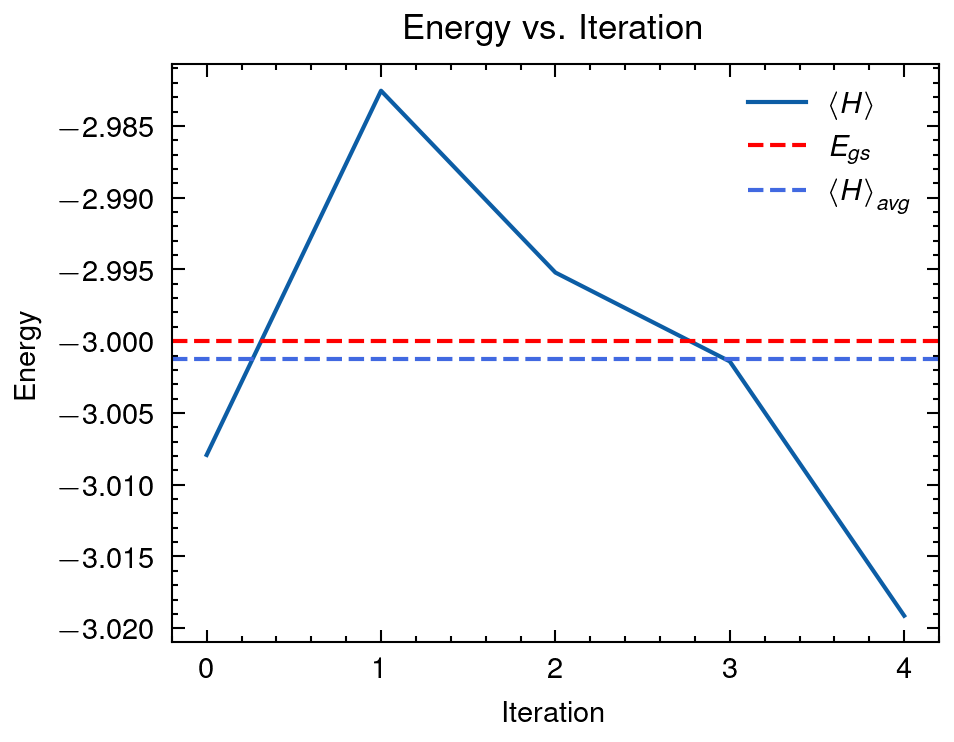

In [33]:
import matplotlib.pyplot as plt
import scienceplots
import os

plt.style.use(['science', 'nature'])
plt.rcParams['figure.dpi'] = 300

plt.plot(range(len(total_history_values)), total_history_values, label=r'${\langle H\rangle}$')

plt.xlabel('Iteration')
plt.ylabel(r"Energy")
plt.title('Energy vs. Iteration')
plt.axhline(y=-3.0, color='r', linestyle='--', label=r"${E}_{{gs}}$")

avg = sum(total_history_values) / len(total_history_values)
plt.axhline(y=avg, color='royalblue', linestyle='--', label=r'${\langle H\rangle}_{avg}$')

plt.legend()

if not os.path.exists('plots'):
    os.makedirs('plots')
plt.savefig(f'plots/final_energy.pdf', format='pdf')
plt.show()

In [27]:
print(avg)

-3.0012475657909703


In [29]:
# Percent difference
percent_diff = ((avg - (-3.0)) / (-3.0)) * 100
print(f"Percent difference: {percent_diff:.3f}%")

Percent difference: 0.042%
